# EDA 1: Impact of provider fairness factor

In [1]:
from itertools import product

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_dataset(model_name, dataset, provider_factor = 0):
    dataset_sizes = {
        'Yelp': 7135,
        'Gowalla': 5628
    }
    fairness = 'None'
    if provider_factor != 0:
        fairness = 'Provider' + str(provider_factor)
    filename = f"../Outputs/Eval_{model_name}_TopK_{fairness}_{dataset}_Sum_{dataset_sizes[dataset]}user_top10_limit15.csv"
    return pd.read_csv(filename)

In [3]:
dataset_iter = product(
    ['USG', 'GeoSoCa', 'LORE'],
    ['Yelp', 'Gowalla'],
    # ['USG'],
    # ['Yelp'],
    [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
)

_dfs = []

for model_name, dataset, provider_factor in dataset_iter:
    _df = load_dataset(model_name, dataset, provider_factor)
    _df['model'] = model_name
    _df['dataset'] = dataset
    _df['provider_coef'] = provider_factor
    _dfs.append(_df)

df = pd.concat(_dfs)

In [4]:
df.head()

,precision,recall,ndcg,map,mean_median_distance,gce_users,precision_active_users,precision_inactive_users,gce_items,exposure_short_head,exposure_long_tail,model,dataset,provider_coef
0,0.02968,0.04478,0.03981,0.01991,115.60542,-0.07079,0.05683,0.02290,-235.56310,22.53447,0.00773,USG,Yelp,0.0
0,0.02968,0.04478,0.03981,0.01991,115.34348,-0.07079,0.05683,0.02290,-217.40294,22.53163,0.00838,USG,Yelp,0.1
0,0.02968,0.04479,0.03979,0.01989,115.12947,-0.07079,0.05683,0.02290,-85.99498,22.47818,0.02111,USG,Yelp,0.2
0,0.02953,0.04447,0.03958,0.01981,115.35191,-0.07221,0.05683,0.02270,-17.20043,22.14706,0.10320,USG,Yelp,0.3
0,0.02863,0.04312,0.03873,0.01942,114.37566,-0.07173,0.05501,0.02204,-4.41655,21.06104,0.37227,USG,Yelp,0.4


## Impact of provider coefficient on metrics

In [5]:
METRIC_NAME_MAP = {
    'precision': 'Precision@10',
    'recall': 'Recall@10',
    'ndcg': 'NDCG@10',
    'map': 'mAP',
    'mean_median_distance': 'Median distance',
    'gce_users': 'GCE for user fairness',
    'precision_active_users': 'Precision@10 (active users)',
    'precision_inactive_users': 'Precision@10 (inactive users)',
    'gce_items': 'GCE for item fairness',
    'exposure_short_head': 'Exposure count (short-head POIs)',
    'exposure_long_tail': 'Exposure count (long-tail POIs)',
}

In [31]:
def plot_provider_coef(df, metric):
    _df = df[[metric, 'model', 'dataset', 'provider_coef']]
    _df = _df.replace([np.inf, -np.inf], np.nan)
    _df = _df[~_df[metric].isna()]
    metric_name = METRIC_NAME_MAP[metric]

    fig, axs = plt.subplots(1, 2, figsize=(16, 6))
    sns.lineplot(data=_df[_df['dataset'] == 'Yelp'], x='provider_coef', y=metric, hue='model', marker='o', ax=axs[0])
    axs[0].legend()
    axs[0].set_xlabel('Provider factor coefficient')
    axs[0].set_ylabel(metric_name)
    axs[0].set_title(f'Impact of provider factor on {metric_name} (Yelp)')
    sns.lineplot(data=_df[_df['dataset'] == 'Gowalla'], x='provider_coef', y=metric, hue='model', marker='o', ax=axs[1])
    axs[1].legend()
    axs[1].set_xlabel('Provider factor coefficient')
    axs[1].set_ylabel(metric_name)
    axs[1].set_title(f'Impact of provider factor on {metric_name} (Gowalla)')

    fig.savefig(f"images/{metric}_vs_sigmoid_provider_alpha.png", bbox_inches='tight')
    return fig, axs

(<Figure size 1600x600 with 2 Axes>,
 array([<Axes: title={'center': 'Impact of provider factor on Precision@10 (Yelp)'}, xlabel='Provider factor coefficient', ylabel='Precision@10'>,
        <Axes: title={'center': 'Impact of provider factor on Precision@10 (Gowalla)'}, xlabel='Provider factor coefficient', ylabel='Precision@10'>],
       dtype=object))

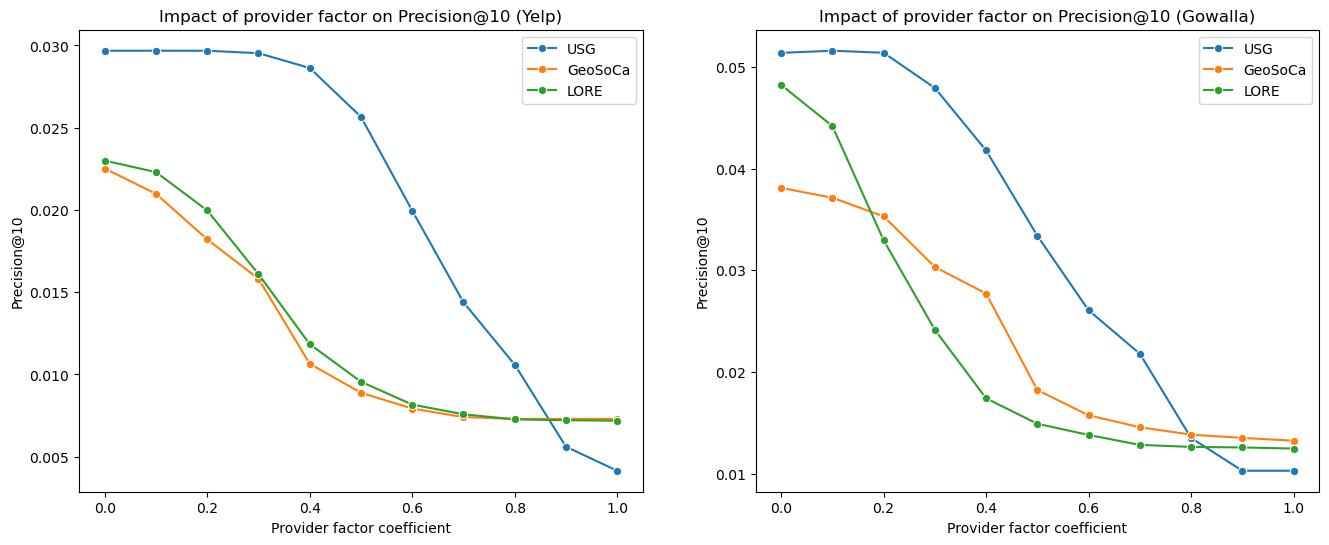

In [8]:
plot_provider_coef(df, 'precision')

(<Figure size 1600x600 with 2 Axes>,
 array([<Axes: title={'center': 'Impact of provider factor on Recall@10 (Yelp)'}, xlabel='Provider factor coefficient', ylabel='Recall@10'>,
        <Axes: title={'center': 'Impact of provider factor on Recall@10 (Gowalla)'}, xlabel='Provider factor coefficient', ylabel='Recall@10'>],
       dtype=object))

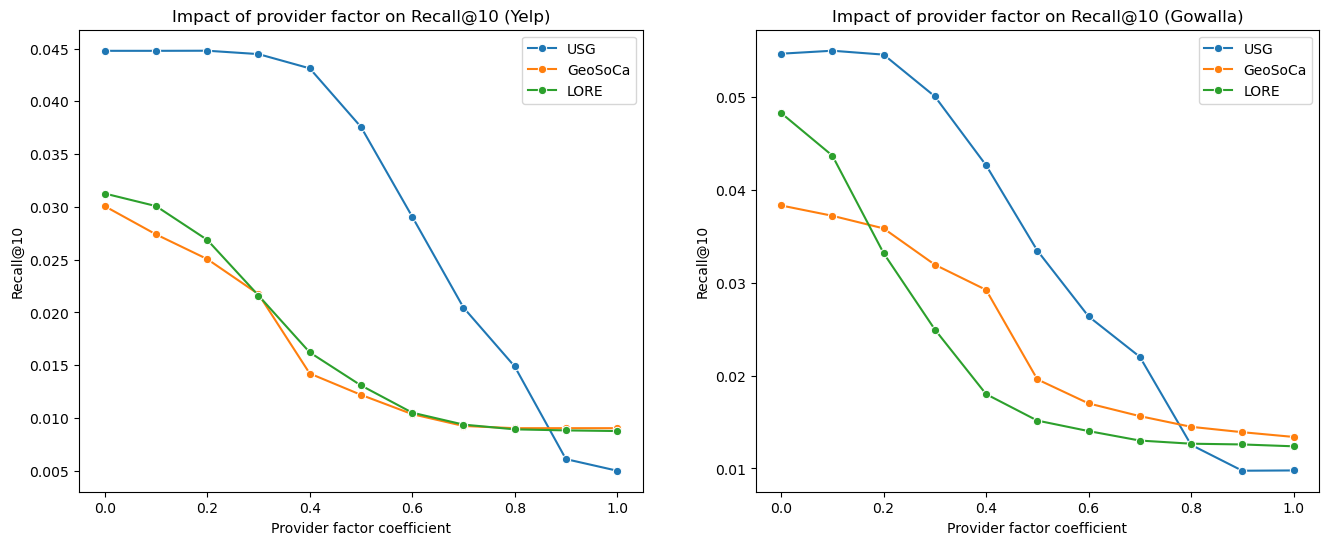

In [9]:
plot_provider_coef(df, 'recall')

(<Figure size 1600x600 with 2 Axes>,
 array([<Axes: title={'center': 'Impact of provider factor on mAP (Yelp)'}, xlabel='Provider factor coefficient', ylabel='mAP'>,
        <Axes: title={'center': 'Impact of provider factor on mAP (Gowalla)'}, xlabel='Provider factor coefficient', ylabel='mAP'>],
       dtype=object))

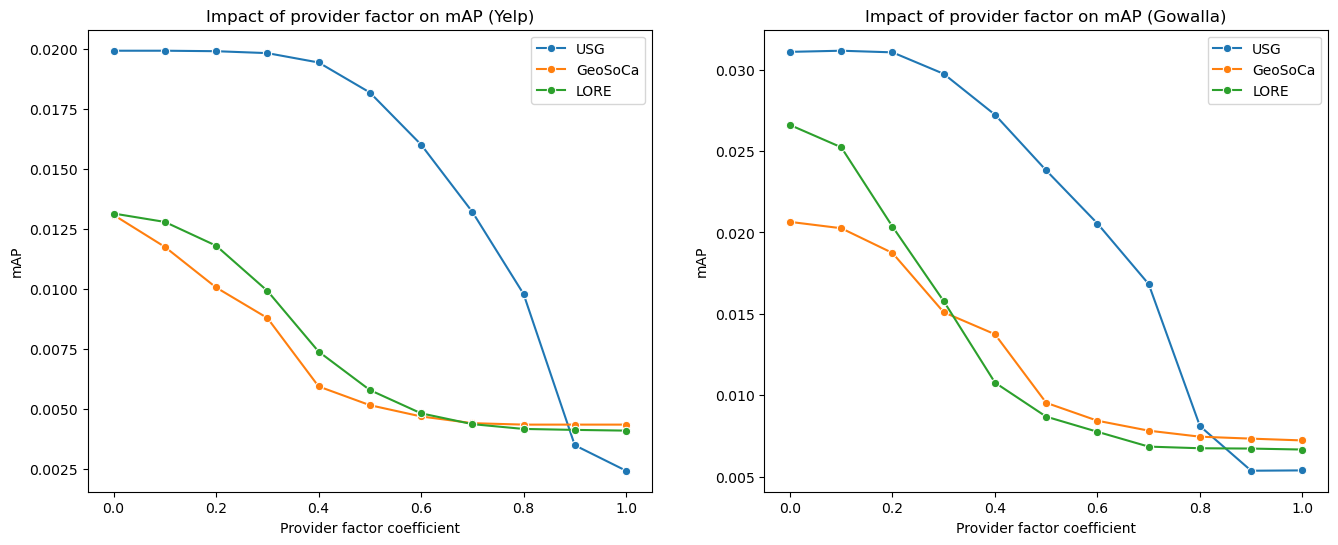

In [10]:
plot_provider_coef(df, 'map')

(<Figure size 1600x600 with 2 Axes>,
 array([<Axes: title={'center': 'Impact of provider factor on NDCG@10 (Yelp)'}, xlabel='Provider factor coefficient', ylabel='NDCG@10'>,
        <Axes: title={'center': 'Impact of provider factor on NDCG@10 (Gowalla)'}, xlabel='Provider factor coefficient', ylabel='NDCG@10'>],
       dtype=object))

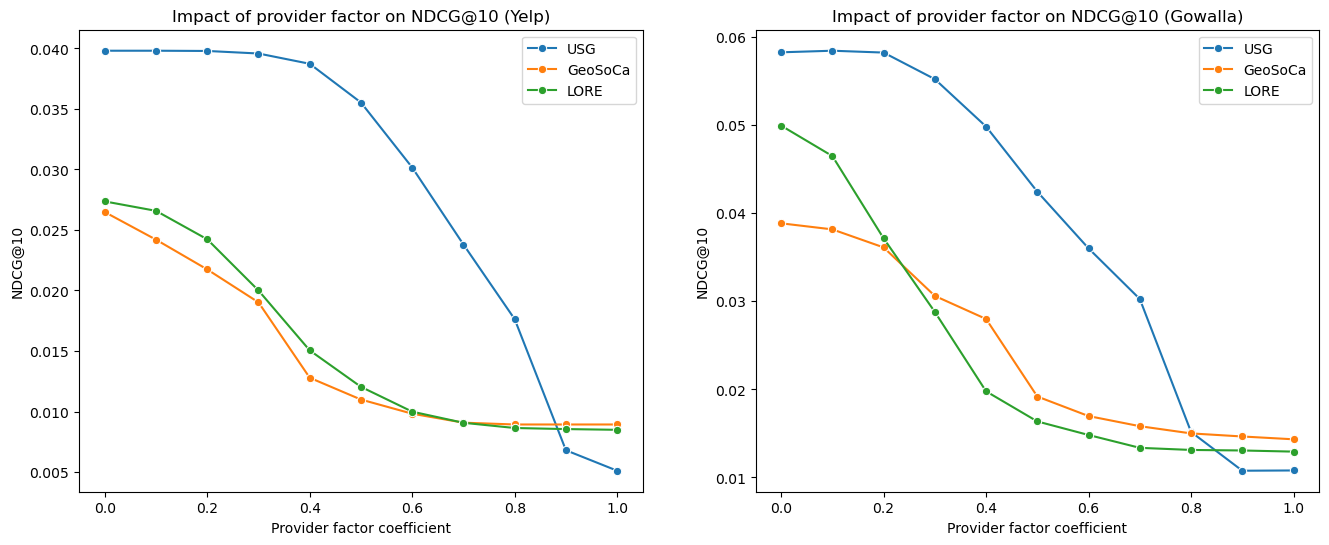

In [11]:
plot_provider_coef(df, 'ndcg')

## Fairness

(<Figure size 1600x600 with 2 Axes>,
 array([<Axes: title={'center': 'Impact of provider factor on GCE for user fairness (Yelp)'}, xlabel='Provider factor coefficient', ylabel='GCE for user fairness'>,
        <Axes: title={'center': 'Impact of provider factor on GCE for user fairness (Gowalla)'}, xlabel='Provider factor coefficient', ylabel='GCE for user fairness'>],
       dtype=object))

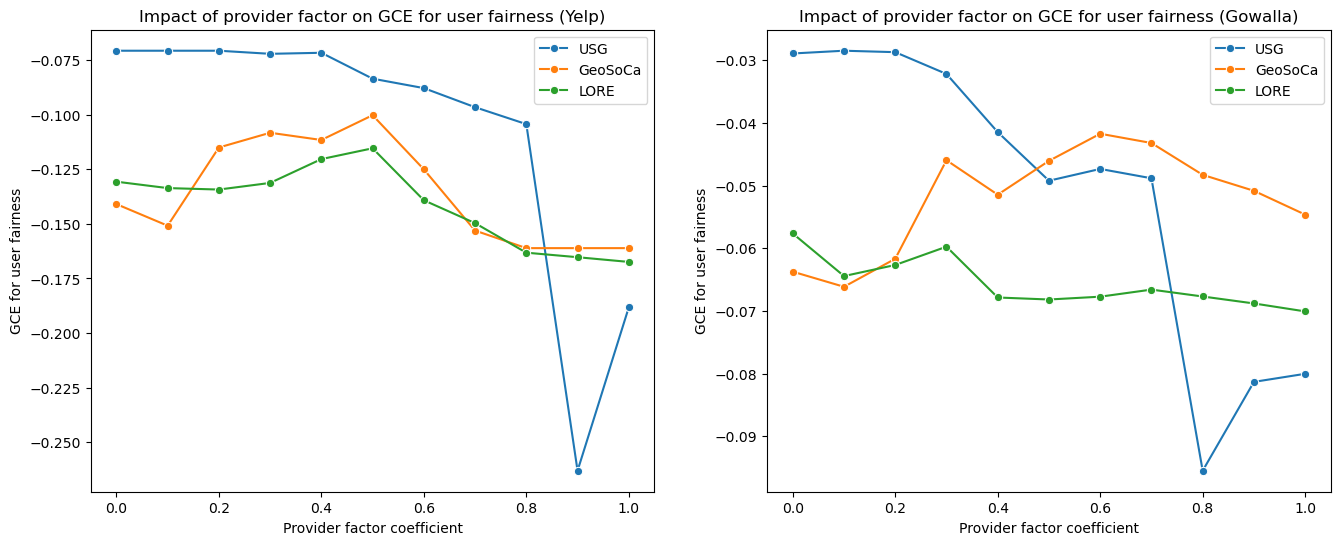

In [29]:
plot_provider_coef(df, 'gce_users')

(<Figure size 1600x600 with 2 Axes>,
 array([<Axes: title={'center': 'Impact of provider factor on GCE for item fairness (Yelp)'}, xlabel='Provider factor coefficient', ylabel='GCE for item fairness'>,
        <Axes: title={'center': 'Impact of provider factor on GCE for item fairness (Gowalla)'}, xlabel='Provider factor coefficient', ylabel='GCE for item fairness'>],
       dtype=object))

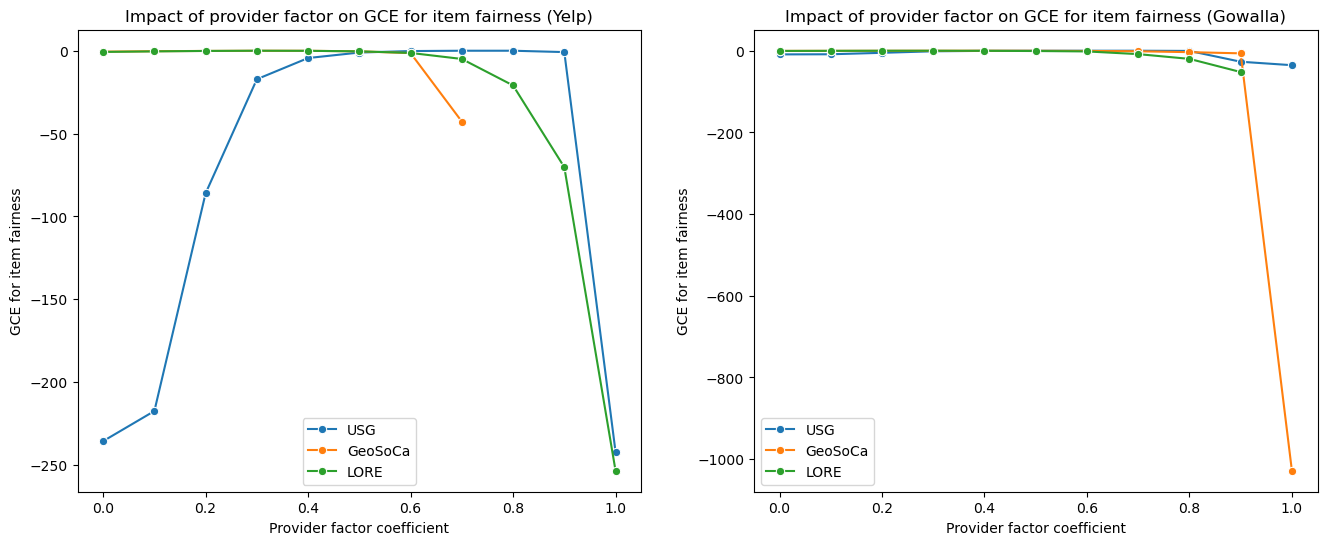

In [32]:
plot_provider_coef(df, 'gce_items')

## Fairness (specific)

(<Figure size 1600x600 with 2 Axes>,
 array([<Axes: title={'center': 'Impact of provider factor on Exposure count (long-tail POIs) (Yelp)'}, xlabel='Provider factor coefficient', ylabel='Exposure count (long-tail POIs)'>,
        <Axes: title={'center': 'Impact of provider factor on Exposure count (long-tail POIs) (Gowalla)'}, xlabel='Provider factor coefficient', ylabel='Exposure count (long-tail POIs)'>],
       dtype=object))

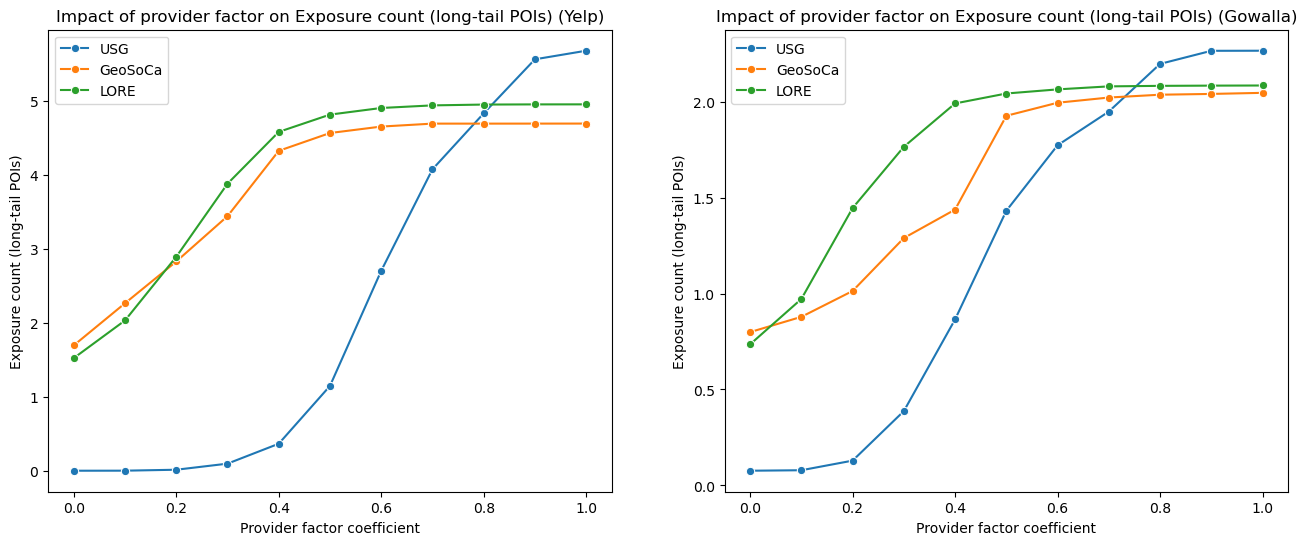

In [33]:
plot_provider_coef(df, 'exposure_long_tail')

(<Figure size 1600x600 with 2 Axes>,
 array([<Axes: title={'center': 'Impact of provider factor on Exposure count (short-head POIs) (Yelp)'}, xlabel='Provider factor coefficient', ylabel='Exposure count (short-head POIs)'>,
        <Axes: title={'center': 'Impact of provider factor on Exposure count (short-head POIs) (Gowalla)'}, xlabel='Provider factor coefficient', ylabel='Exposure count (short-head POIs)'>],
       dtype=object))

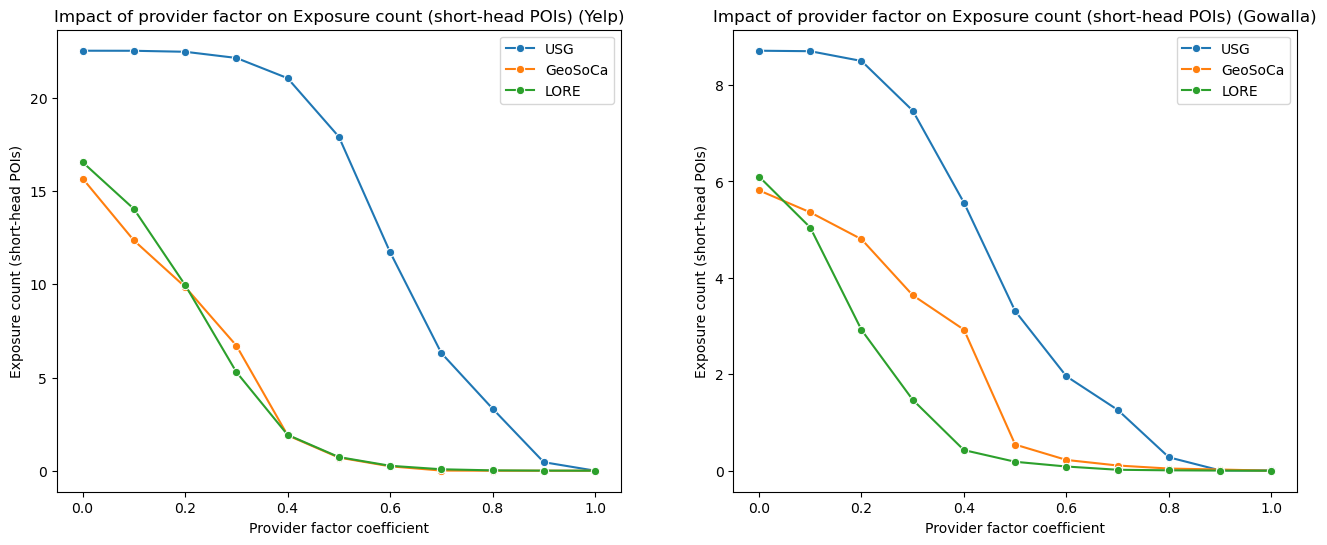

In [34]:
plot_provider_coef(df, 'exposure_short_head')

(<Figure size 1600x600 with 2 Axes>,
 array([<Axes: title={'center': 'Impact of provider factor on Precision@10 (active users) (Yelp)'}, xlabel='Provider factor coefficient', ylabel='Precision@10 (active users)'>,
        <Axes: title={'center': 'Impact of provider factor on Precision@10 (active users) (Gowalla)'}, xlabel='Provider factor coefficient', ylabel='Precision@10 (active users)'>],
       dtype=object))

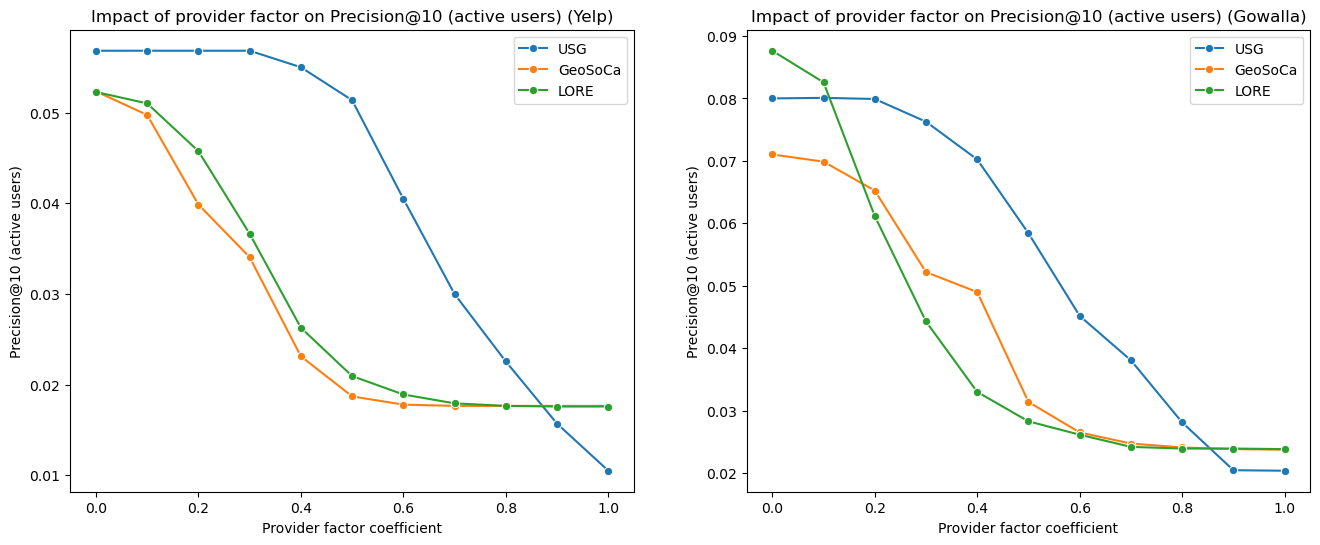

In [35]:
plot_provider_coef(df, 'precision_active_users')

(<Figure size 1600x600 with 2 Axes>,
 array([<Axes: title={'center': 'Impact of provider factor on Precision@10 (inactive users) (Yelp)'}, xlabel='Provider factor coefficient', ylabel='Precision@10 (inactive users)'>,
        <Axes: title={'center': 'Impact of provider factor on Precision@10 (inactive users) (Gowalla)'}, xlabel='Provider factor coefficient', ylabel='Precision@10 (inactive users)'>],
       dtype=object))

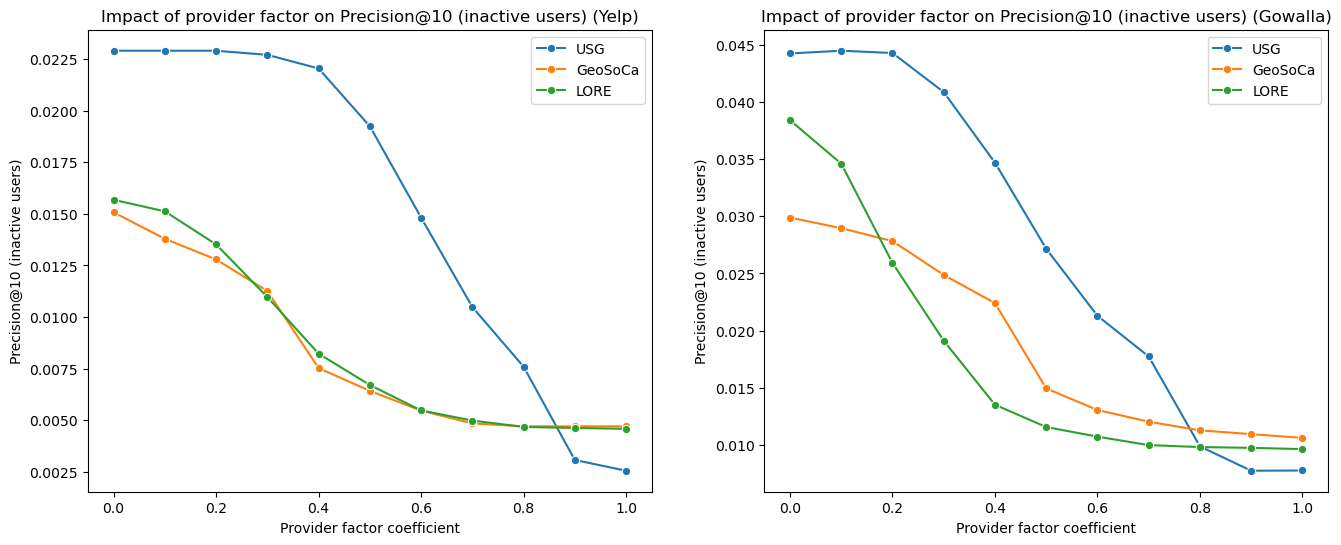

In [36]:
plot_provider_coef(df, 'precision_inactive_users')

## Misc

(<Figure size 1600x600 with 2 Axes>,
 array([<Axes: title={'center': 'Impact of provider factor on Median distance (Yelp)'}, xlabel='Provider factor coefficient', ylabel='Median distance'>,
        <Axes: title={'center': 'Impact of provider factor on Median distance (Gowalla)'}, xlabel='Provider factor coefficient', ylabel='Median distance'>],
       dtype=object))

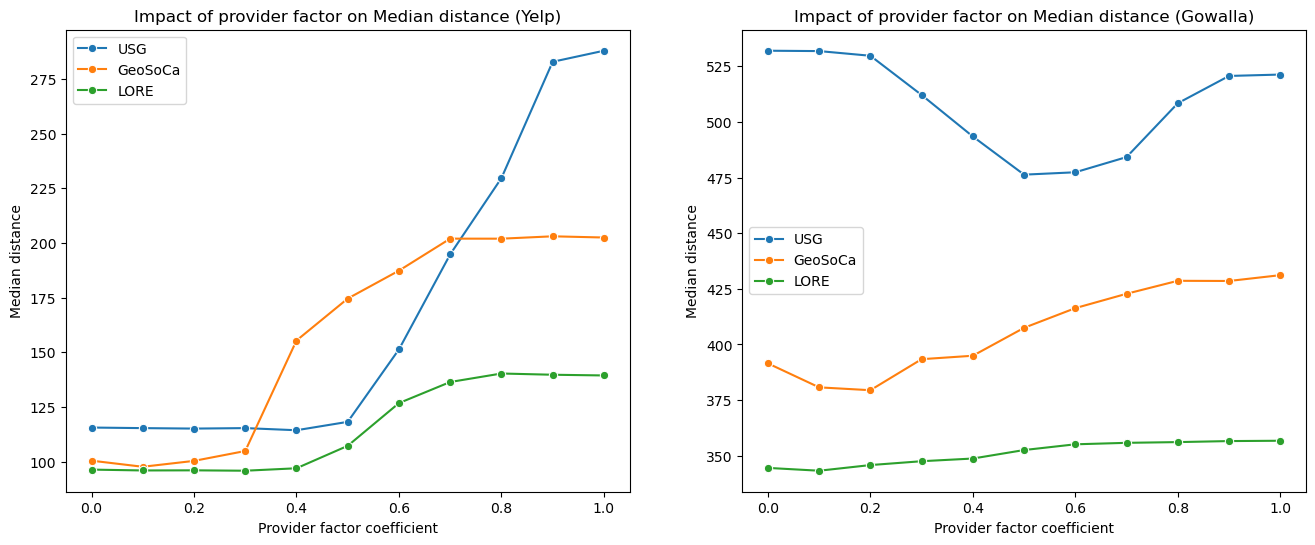

In [37]:
plot_provider_coef(df, 'mean_median_distance')